In today's session we want to compute all possible features and analyze them, by trying different models.

In [51]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

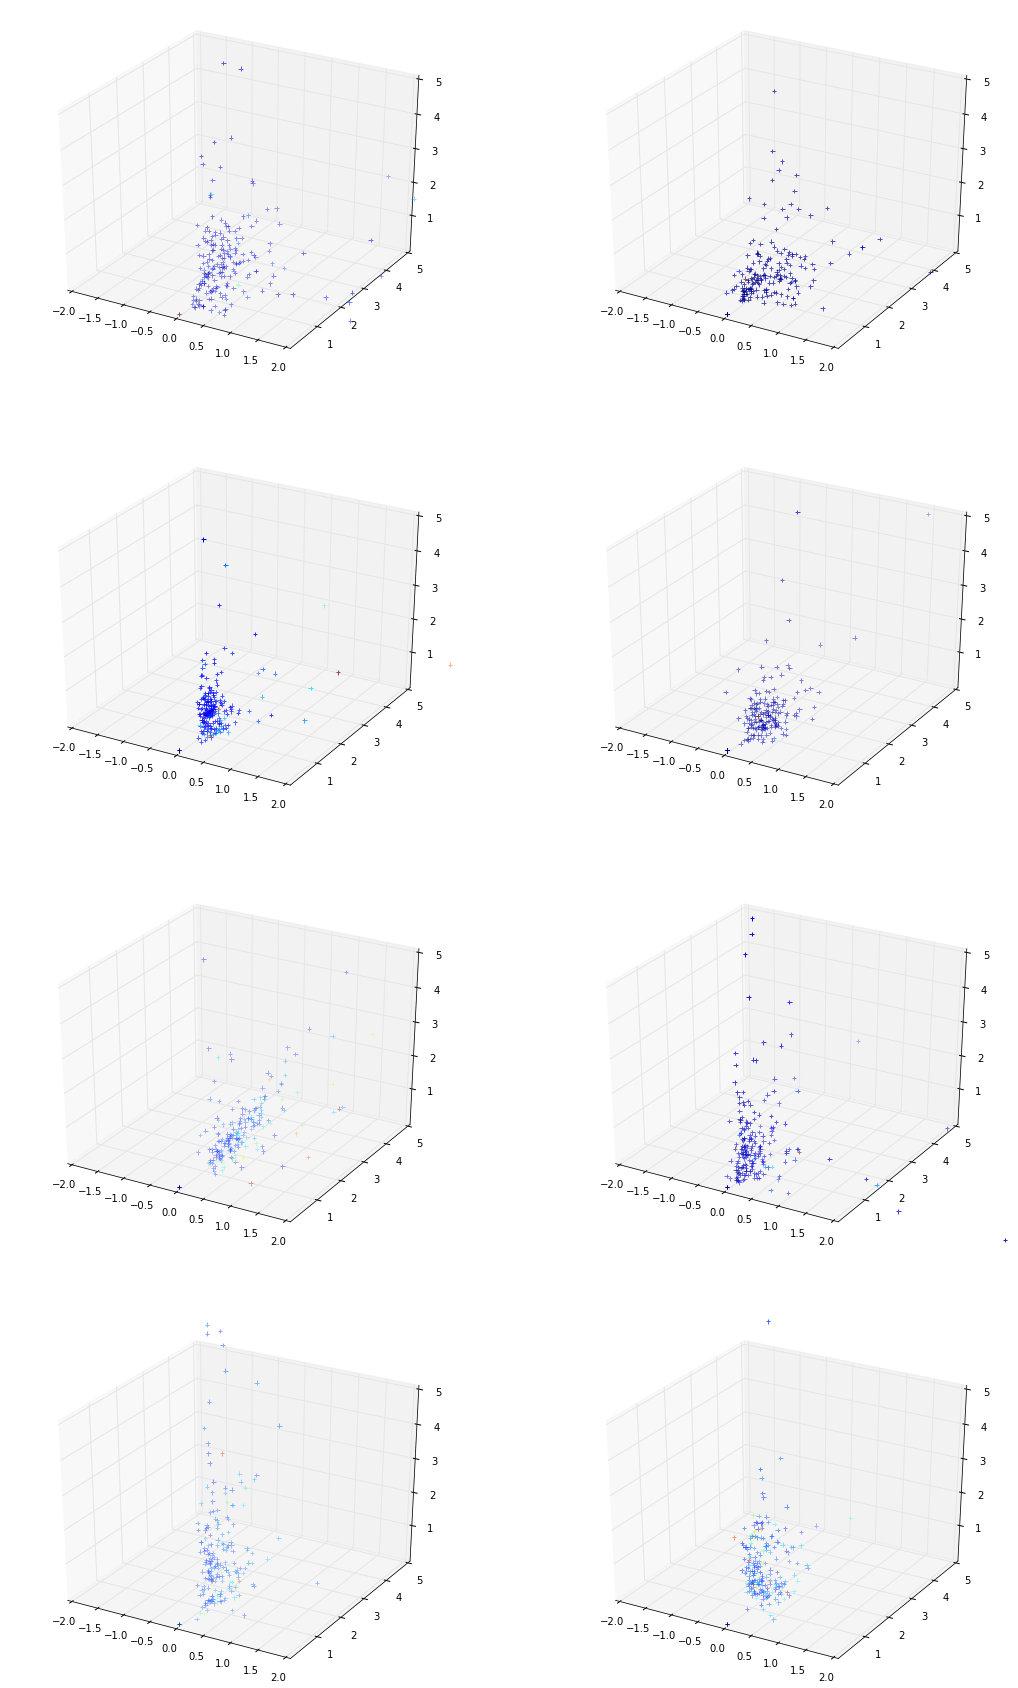

In [88]:
pdyban = __import__("SubmissionScript")
scigor = __import__("Session 4 scigor side curvature speed feature")

pathToDriverData = '../drivers/'

import DriverChallengeHelperFunctions as helpers
import DriverDataIO as io
import DriverChallengeVisualization as vis

drivers = (13, 1256, 28, 117, 2689, 33, 198, 200)

plots = []
max_y = 0.0
    
plt.figure(figsize=(18,30))
features = [(10, 30, True, np.median), (31, 50, True, np.median), (51, 80, True, np.median), (10, 30, False, np.median)]

#max_x = max_y = max_z = 4.0

def find_outliers(feature_array, contamination, outliers_fraction):
    return scigor.find_outliers(_feature_array, contamination, outliers_fraction)

for index, d in enumerate(drivers):
    _feature_array = pdyban.compute_all_acc_features(d, features)    
    _pred = find_outliers(_feature_array, contamination=.05, outliers_fraction=0.02)
    
    x, y, z, c = [i[1] for i in _feature_array], [i[2] for i in _feature_array], [i[3] for i in _feature_array], [i[4] for i in _feature_array]
    
    #for _x in x:
    #    _x = min(_x, max_x)
    #    
    #for _y in y:
    #    _y = min(_y, max_y)
    #    
    #for _z in z:
    #    _z = min(_z, max_z)
        
    from sklearn.gaussian_process import GaussianProcess
    
    #p = plt.subplot(2,4, index)
    #p.scatter([i[1] for i in _feature_array], [i[2] for i in _feature_array], c=_pred, cmap='cool')
    #p.scatter([i[1] for i in _feature_array], [i[2] for i in _feature_array], c=[i[3] for i in _feature_array], cmap='jet')
    
    p = plt.subplot(4, 2, index, projection='3d')
    p.scatter(x, y, z, c=c, marker='+')
    
    p.set_xlim(-2, 2)
    p.set_ylim(0.01, 5)
    p.set_zlim(0.01, 5)

Compute angle features

Idea: for each feature, generate a classification and submit it.

In [82]:
import numpy as np

features = [(10, 30, True, np.median), (31, 50, True, np.median), (51, 80, True, np.median), (10, 30, False, np.median)]

In [89]:
drivers =  (13, 1256, 28, 117, 2689, 33, 198, 200)


for index, d in enumerate(drivers):
    _feature_array = pdyban.compute_all_acc_features(d, features)    
    _pred = find_outliers(_feature_array, contamination=.05, outliers_fraction=0.02)

for feature in features:
    

IndentationError: expected an indented block (<ipython-input-89-1ad4b6be000e>, line 10)

Next, we are tired and want to create n submissions for each feature separately.

In [95]:
PARALLEL = True

from datetime import datetime
import os
from joblib import Parallel, delayed  # for parallel for loop
from SubmissionScript import *

def _create_submission(_driver, _path, _features):
    """
    Creates a single submission file.

    :param _driver: driver for which a csv submission file will be created
    :param _path: subdirectory where this submission part will be stored
    """
    res = []
    features_array = compute_all_acc_features(int(_driver), _features)
    D = np.ones(len(features_array))*int(_driver)
    features_array = np.c_[ D, features_array]

    res.extend(fit_elliptic_envelope(features_array))
    submission_path = os.path.join(_path, str(_driver) + '.csv')
    create_submission(submission_path, res)

def create_complete_submission(_feature):
    subdir = '../submissions/' + datetime.now().strftime('%Y%m%d__%H%M%S')
    # create tmp directory for dumping all trips into
    os.makedirs(subdir)

    if PARALLEL:
        Parallel(n_jobs=8)(delayed(_create_submission)(driver, subdir, _feature) for driver in list_all_drives())
        #Parallel(n_jobs=8)(delayed(_create_submission)(driver, subdir, _feature) for driver in [1,2,3])

    else:
        #for driver in list_all_drivers():
        #    _create_submission(driver, subdir)
        #    raise Exception('Stop me')
        [_create_submission(driver, subdir) for driver in list_all_drives()]

    #subprocess.call("cat *.csv >submission.csv", cwd=subdir)

    # when this script is finished, call cat *.csv >submission.csv, to merge all files into 1
    return subdir


features = [(10, 30, True, np.median), 
            (31, 50, True, np.median), 
            (51, 80, True, np.median), 
            (10, 30, False, np.median), 
            (31, 50, False, np.median), 
            (51, 80, False, np.median)]

for feature in features:
    subdir = create_complete_submission(features)
    print 'created submission file in %s for feature %s' % (subdir, feature)

submission file written to ../submissions/104747/1.csv
submission file written to ../submissions/104747/2.csv
submission file written to ../submissions/104747/3.csv


OSError: [Errno 2] No such file or directory